In [75]:
from amftrack.pipeline.development.high_mag_videos.kymo_class import *
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
%matplotlib widget
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    clean_degree_4,
)
import scipy


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Found an xlsx file, using that data
Analysing FLUO video of 4.0X zoom, with 10.0 fps
Using image selection 0 to 600
Succesfully extracted the skeleton. Did you know there is a skeleton inside inside you right now?

 To work with individual edges, here is a list of their indices:
edge 0, (235, 9)
edge 1, (131, 4)
edge 2, (365, 235)
edge 3, (235, 89)
edge 4, (183, 71)
edge 5, (196, 148)
edge 6, (314, 284)
edge 7, (365, 320)
edge 8, (365, 339)
edge 9, (370, 359)
edge 10, (388, 364)


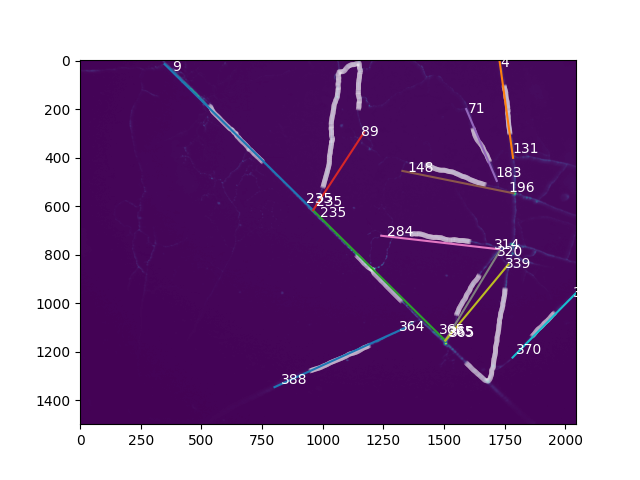

Just saved the extracted edges


In [113]:
img_address = '/gpfs/scratch1/shared/amftrackflow/20230126_528/20230126_Plate528_01/'

test_video = Kymo_video_analysis(img_address, logging=True, vid_type=None, fps=None, binning=None, filter_step=80)
edge_list = test_video.edge_objects

print('\n To work with individual edges, here is a list of their indices:')
for i, edge in enumerate(edge_list):
    print('edge {}, {}'.format(i, edge.edge_name))
    
target_length = 8

test_video.plot_extraction_img(target_length=target_length, save_img=True)
edges_total = test_video.edge_objects

Extracting edge images...


100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 261.49it/s]


Saved an image of the edge
Loading images...


100%|█████████████████████████████████████████████████| 600/600 [00:20<00:00, 29.07it/s]


Extracting edge images...


100%|████████████████████████████████████████████████| 600/600 [00:02<00:00, 282.25it/s]

2023-03-16 16:36:45,397-[WARNING]- imageio_ffmpeg:562 -> IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (8, 255) to (16, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).



[swscaler @ 0x7423040] Warning: data is not aligned! This can lead to a speed loss


Extracting edge images...


100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 93.90it/s]

Saved an image of the edge


Loading images...


100%|████████████████████████████████████████████████| 600/600 [00:03<00:00, 184.60it/s]


Extracting edge images...


100%|█████████████████████████████████████████████████| 600/600 [00:06<00:00, 91.79it/s]

2023-03-16 16:36:56,264-[WARNING]- imageio_ffmpeg:562 -> IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (8, 754) to (16, 768) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).



[swscaler @ 0x74d0d40] Warning: data is not aligned! This can lead to a speed loss


Extracting edge images...


100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 327.60it/s]


Saved an image of the edge
Loading images...


100%|█████████████████████████████████████████████████| 600/600 [00:07<00:00, 75.34it/s]


Extracting edge images...


100%|████████████████████████████████████████████████| 600/600 [00:01<00:00, 428.88it/s]

2023-03-16 16:37:06,241-[WARNING]- imageio_ffmpeg:562 -> IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (8, 166) to (16, 176) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).



[swscaler @ 0x609af80] Warning: data is not aligned! This can lead to a speed loss


Extracting edge images...


100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 125.56it/s]

Saved an image of the edge


Loading images...


100%|████████████████████████████████████████████████| 600/600 [00:03<00:00, 150.90it/s]


Extracting edge images...


100%|████████████████████████████████████████████████| 600/600 [00:04<00:00, 149.02it/s]

2023-03-16 16:37:14,963-[WARNING]- imageio_ffmpeg:562 -> IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (8, 475) to (16, 480) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).



[swscaler @ 0x6f1f0c0] Warning: data is not aligned! This can lead to a speed loss


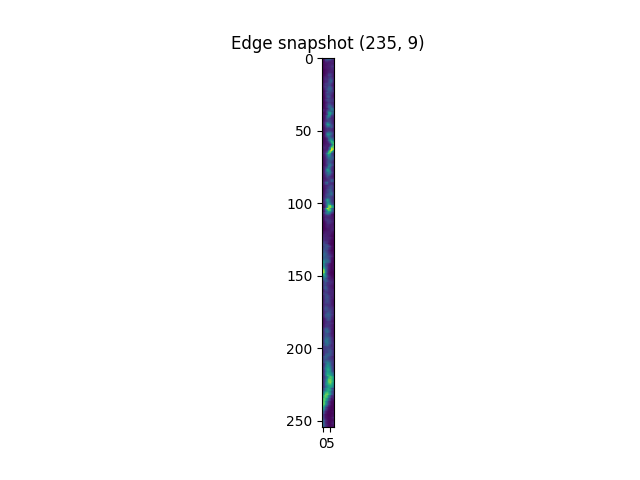

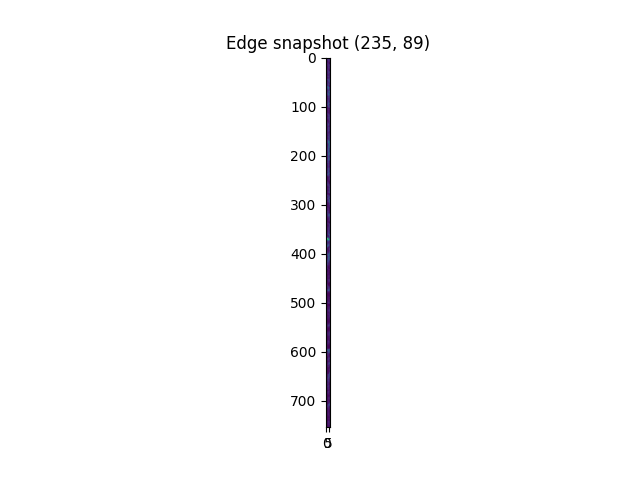

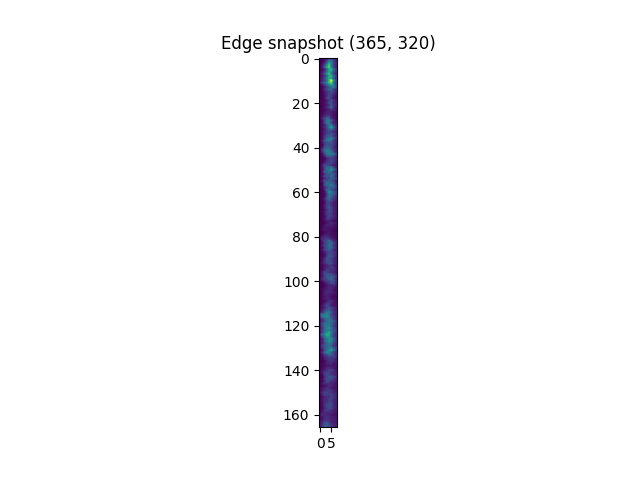

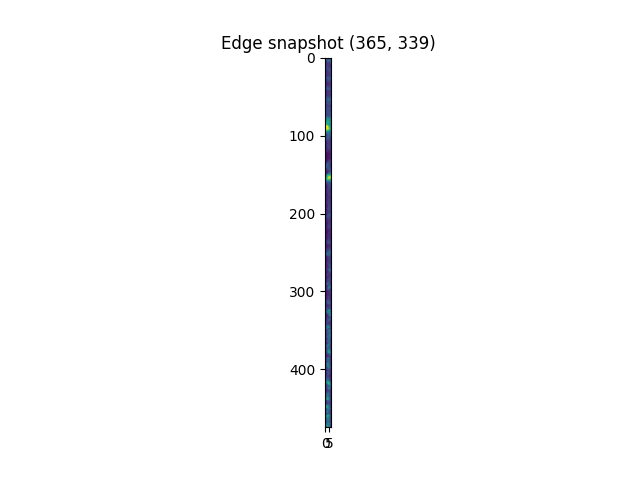

In [114]:
avg_thresh = 10

from itertools import compress

edge_seq = [0, 3, 7, 8]

edge_objs = [edges_total[i] for i in edge_seq]

img_seq = np.arange(len(edge_objs[0].video_analysis.selection_file))

for edge in edge_objs:
    edge_pic = edge.view_edge(img_frame=40 ,save_im=True, target_length = target_length)
    edge_video = edge.view_edge(img_frame = img_seq, save_im=True, quality = 6, target_length=target_length)
#     bounds_space = np.linspace(edge.bounds[0], edge.bounds[1], np.shape(edge_pic)[1])
#     edge_max = np.average(edge_pic, axis=0)
#     a = [i for i in range(len(bounds_space)) if edge_max[i] > avg_thresh]
#     print(bounds_space[a[0]], bounds_space[a[-1]])
#     edge.bounds = [a[0], a[-1]]
#     fig, ax = plt.subplots()
#     ax.plot( np.linspace(edge.bounds[0], edge.bounds[1], len(edge_max)), edge_max)


In [119]:
bin_nr = 1
kymo = [edge.extract_multi_kymo(bin_nr, target_length=target_length) for edge in edge_objs]


100%|█████████████████████████████████████████████████| 600/600 [00:30<00:00, 19.99it/s]


Saved the array
Saved the image


100%|█████████████████████████████████████████████████| 600/600 [00:19<00:00, 31.27it/s]


Saved the array
Saved the image


100%|█████████████████████████████████████████████████| 600/600 [00:07<00:00, 75.71it/s]


Saved the array
Saved the image


100%|█████████████████████████████████████████████████| 600/600 [00:09<00:00, 60.51it/s]


Saved the array
Saved the image


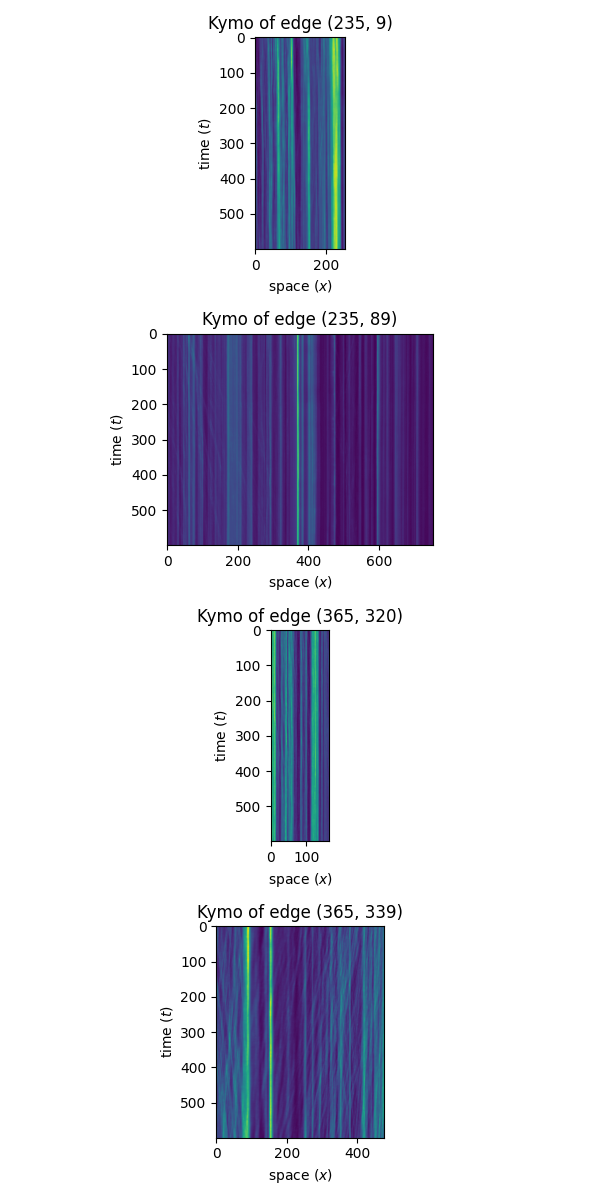

In [120]:
fig, ax = plt.subplots(len(edge_objs), bin_nr, figsize=(6, 12), sharey='row')
count = 0

bin_space = np.linspace(0,1, bin_nr+1)

for i in range(len(edge_objs)):
    for j in range(bin_nr):
        if len(edge_objs) > 1:
            if bin_nr > 1:
                ax[i][j].imshow(kymo[i][j])
                ax[i][j].set_title(f"Kymo [{bin_space[j]}-{bin_space[j+1]}] of edge {edge_objs[i].edge_name}")
                ax[i][j].set_xlabel("space ($x$)")
                ax[i][j].set_ylabel("time ($t$)")
            elif bin_nr == 1:
                ax[i].imshow(kymo[i][0])
                ax[i].set_title(f"Kymo of edge {edge_objs[i].edge_name}")
                ax[i].set_xlabel("space ($x$)")
                ax[i].set_ylabel("time ($t$)")
                
        else:
            ax[j].imshow(kymo[i][j])
            ax[j].set_title(f"Kymo [{bin_space[j]}-{bin_space[j+1]}]")
            ax[j].set_xlabel("space ($x$)")
            ax[j].set_ylabel("time ($t$)")

fig.tight_layout()
# plt.show()

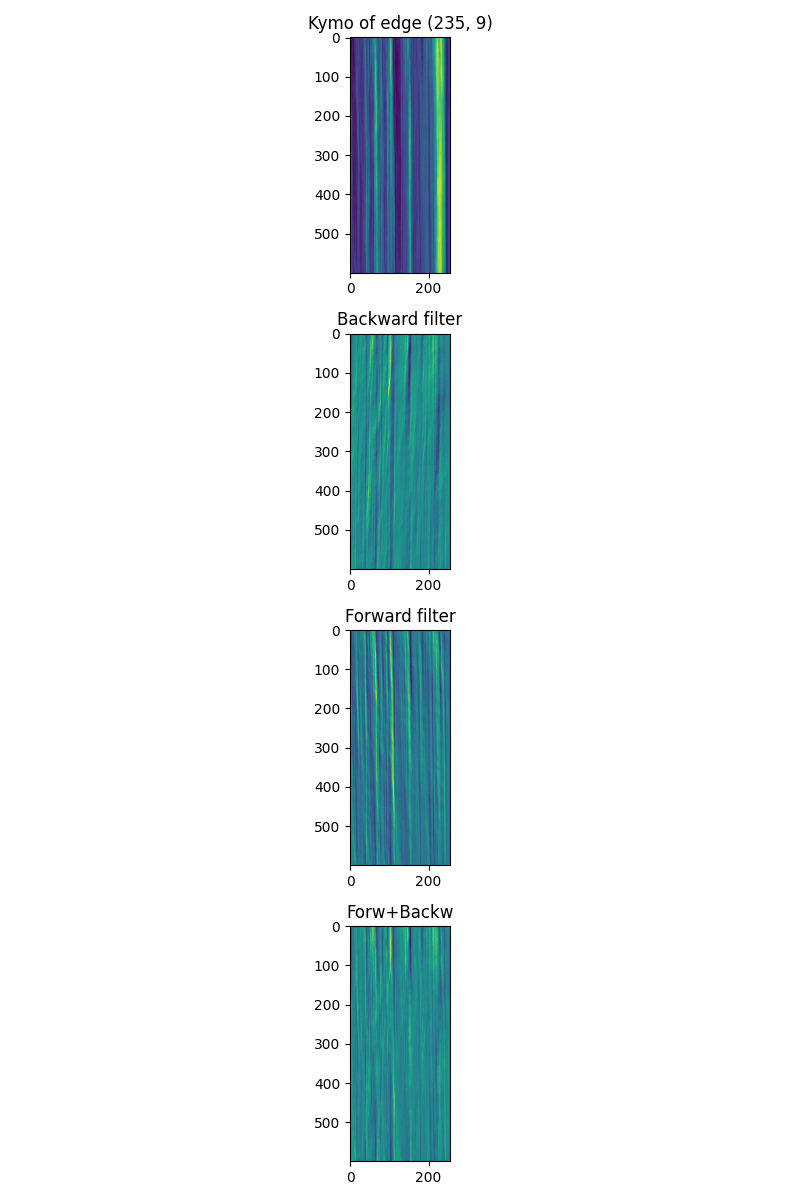

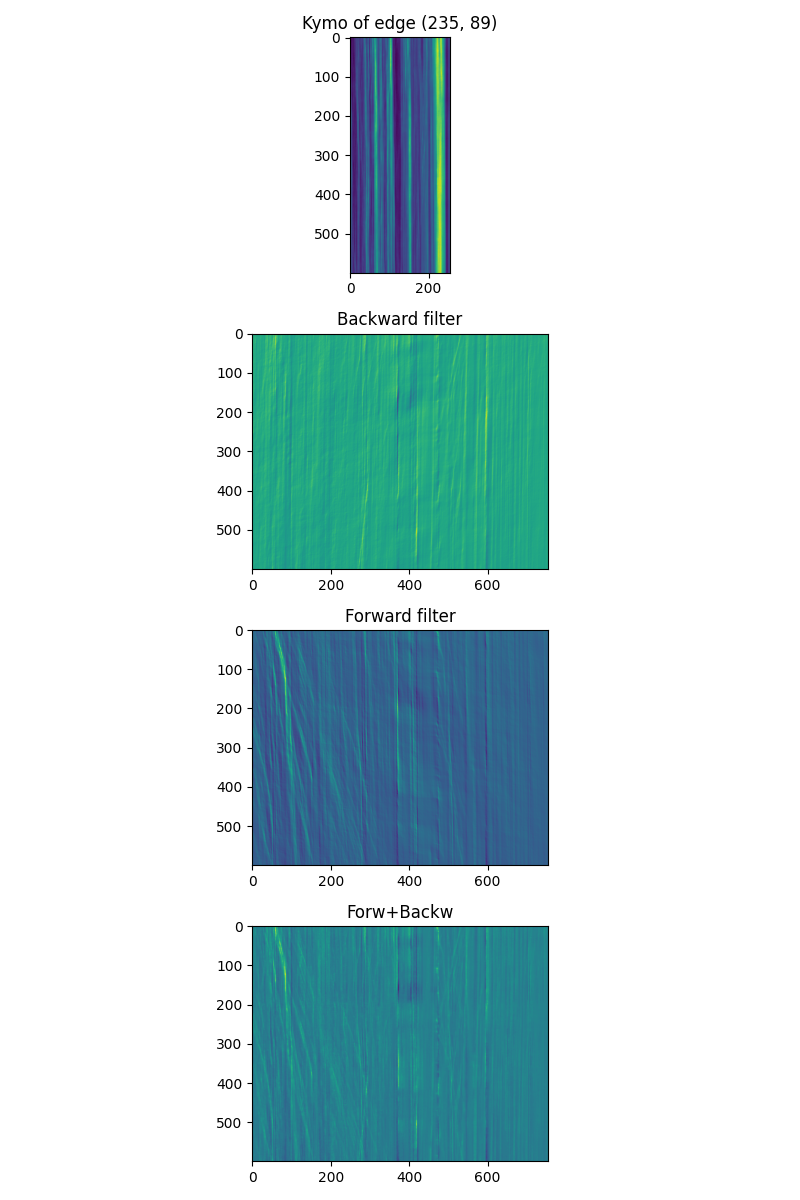

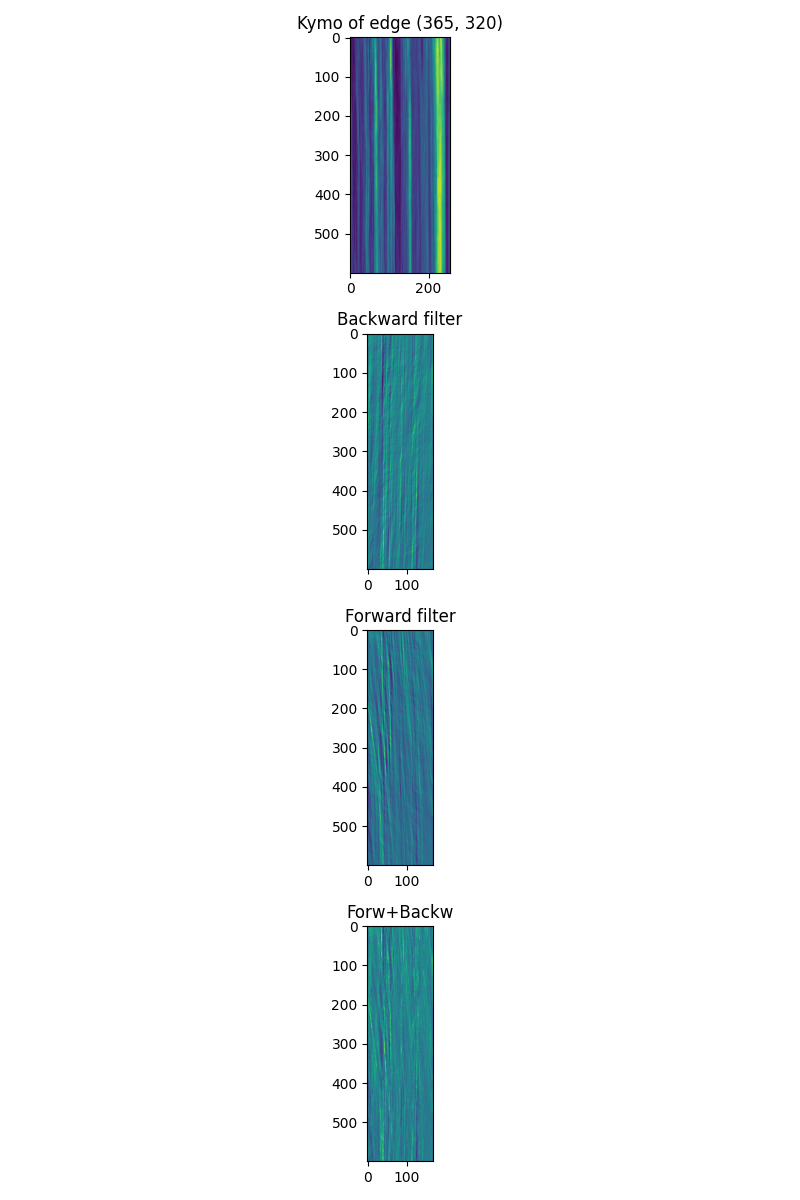

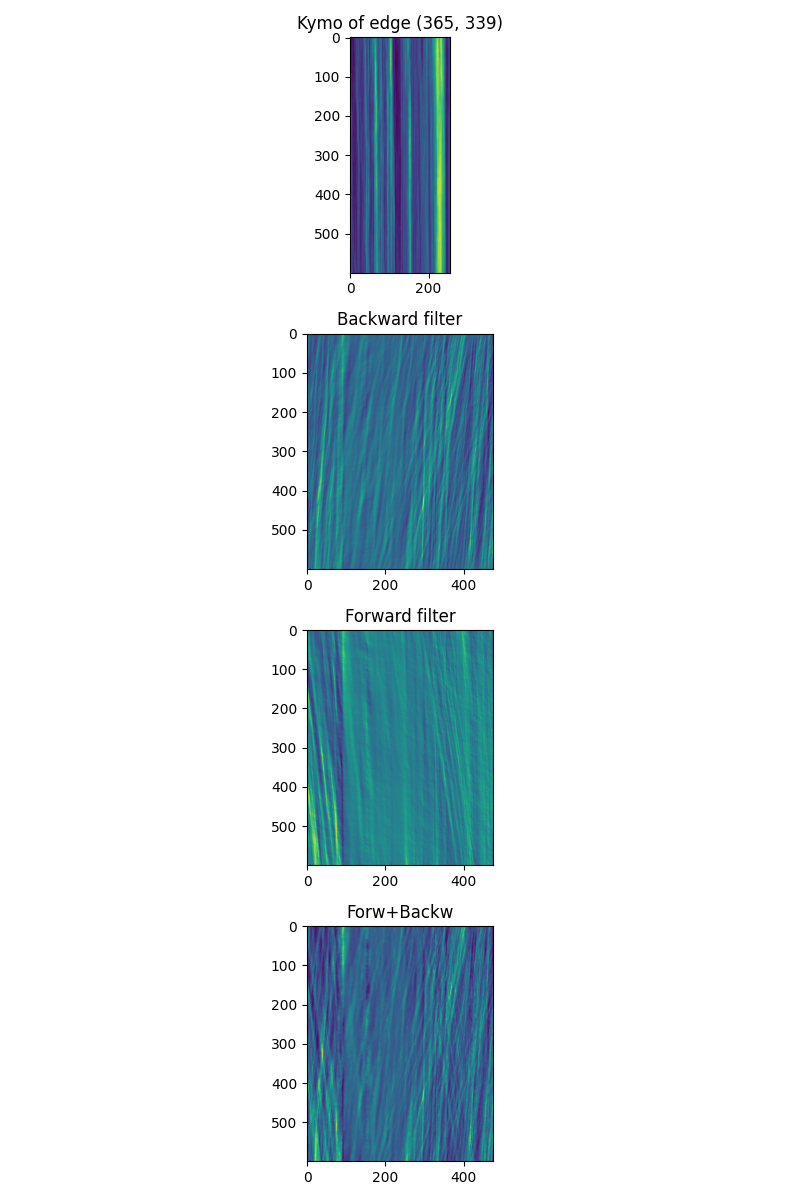

In [121]:
for j, edge_obj in enumerate(edge_objs): 
    kymos_lefts, kymos_rights = edge_objs[j].fourier_kymo()
    fig, ax = plt.subplots(4,bin_nr, figsize=(8, 12), sharey='row')
    if bin_nr == 1:
        for i in range(4):
            ax[i] = [ax[i]]
    for i in range(bin_nr):
        ax[0][i].imshow(kymo[0][i])
        ax[0][i].set_title(f"Kymo of edge {edge_objs[j].edge_name}")

        ax[1][i].imshow(kymos_lefts[i])
        ax[1][i].set_title("Backward filter")

        ax[2][i].imshow(kymos_rights[i])
        ax[2][i].set_title("Forward filter")

        ax[3][i].imshow(kymos_lefts[i] + kymos_rights[i])
        ax[3][i].set_title("Forw+Backw")
    fig.tight_layout()


/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:475: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),
/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:475: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),


Loading images...



 55%|██████████████████████████▋                      | 327/600 [00:12<00:09, 29.31it/s]


 97%|███████████████████████████████████████████████▋ | 584/600 [00:26<00:00, 21.06it/s]


100%|█████████████████████████████████████████████████| 600/600 [00:27<00:00, 21.96it/s]


Extracting edge images...



100%|████████████████████████████████████████████████| 600/600 [00:02<00:00, 203.60it/s]


255
Saved the image


/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:475: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),
/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:475: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),


Loading images...



 48%|███████████████████████▌                         | 288/600 [00:12<00:10, 30.18it/s]


 97%|███████████████████████████████████████████████▌ | 583/600 [00:25<00:00, 17.60it/s]


100%|█████████████████████████████████████████████████| 600/600 [00:26<00:00, 22.49it/s]


Extracting edge images...



100%|█████████████████████████████████████████████████| 600/600 [00:08<00:00, 70.27it/s]


754
Saved the image


/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:475: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),
/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:475: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),


Loading images...



 53%|█████████████████████████▊                       | 316/600 [00:13<00:10, 27.38it/s]


100%|█████████████████████████████████████████████████| 600/600 [00:25<00:00, 23.39it/s]


Extracting edge images...



100%|████████████████████████████████████████████████| 600/600 [00:01<00:00, 318.52it/s]


166
Saved the image


/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:475: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),
/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:475: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),


Loading images...



 61%|█████████████████████████████▋                   | 364/600 [00:13<00:07, 31.82it/s]


100%|█████████████████████████████████████████████████| 600/600 [00:23<00:00, 25.96it/s]


Extracting edge images...



100%|████████████████████████████████████████████████| 600/600 [00:05<00:00, 111.34it/s]


475
Saved the image


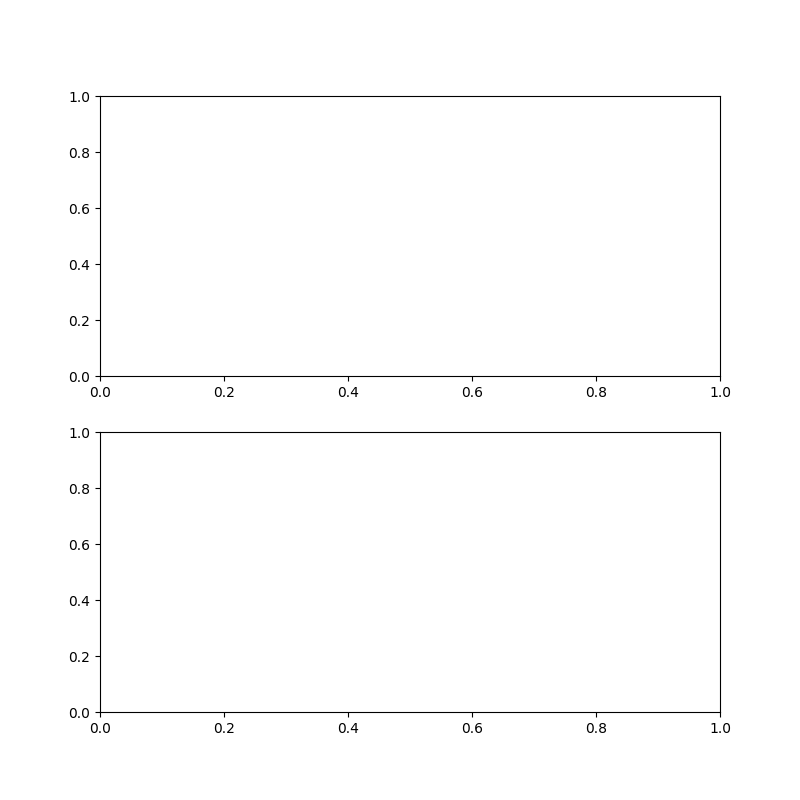

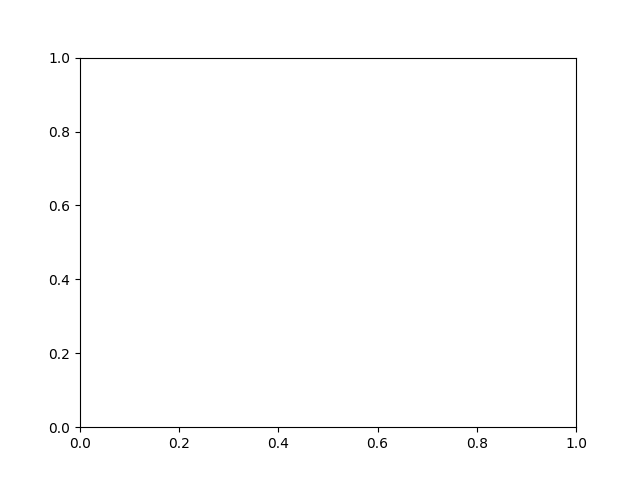

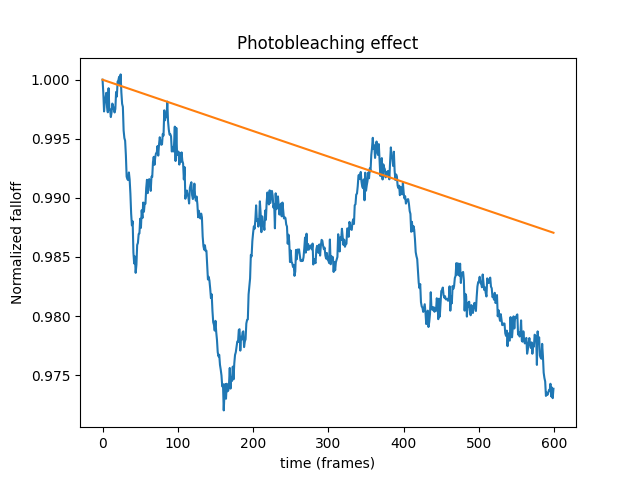

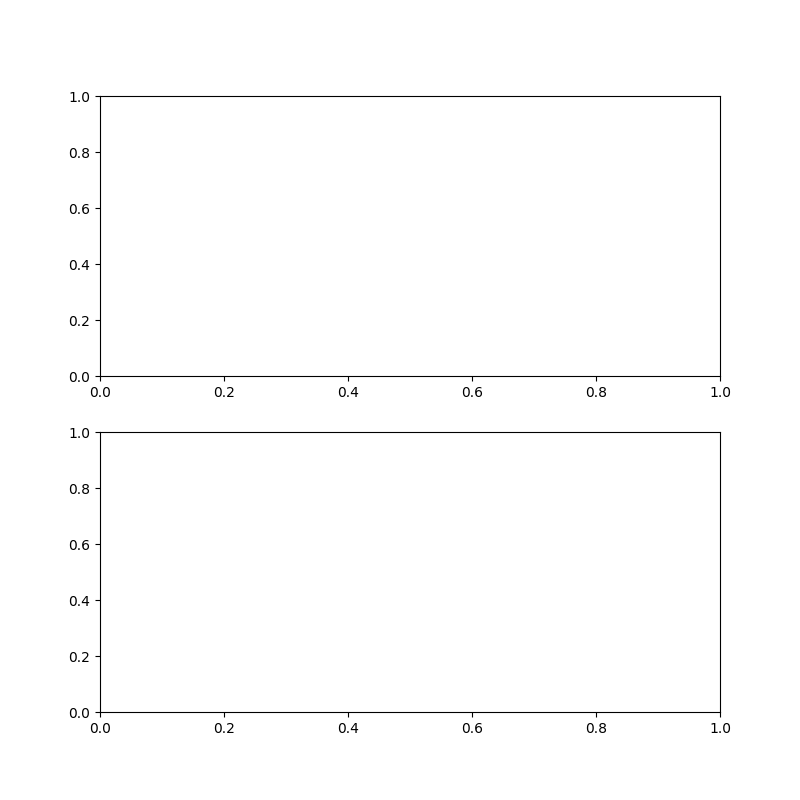

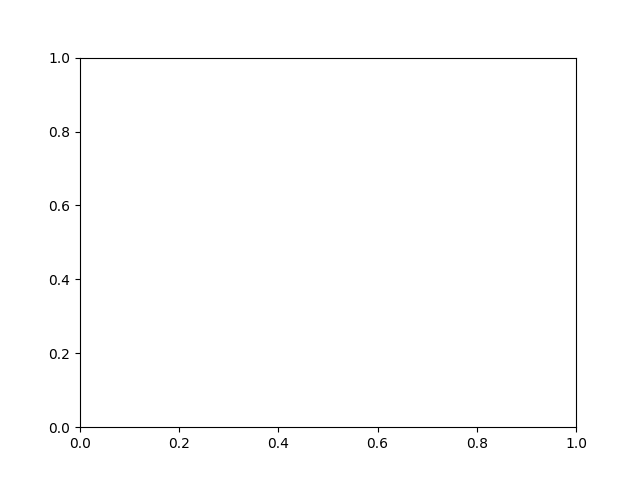

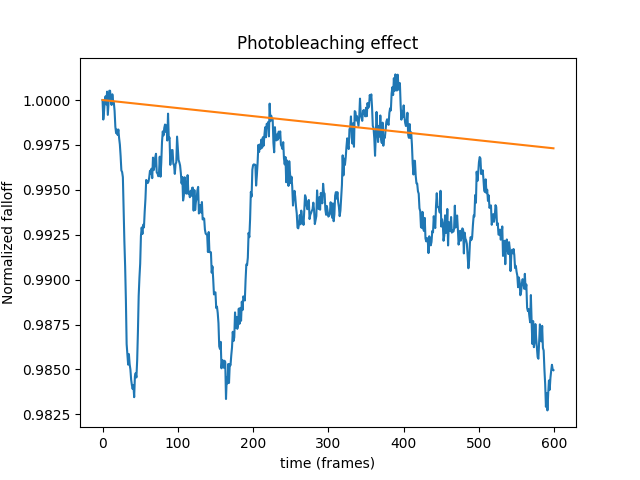

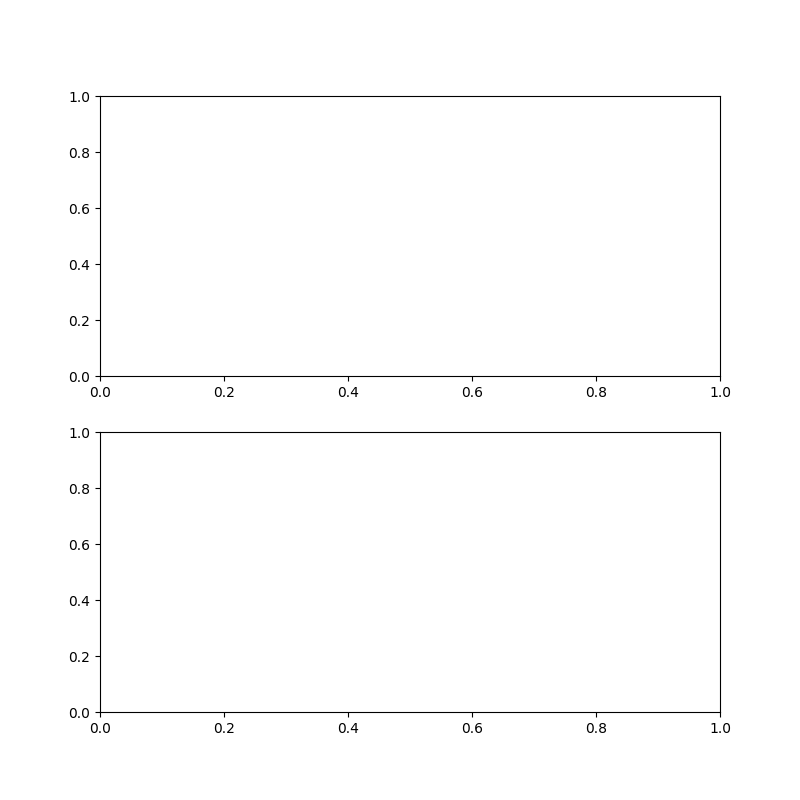

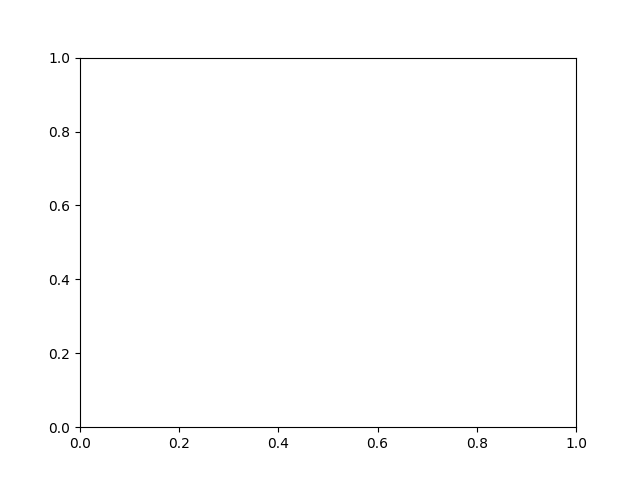

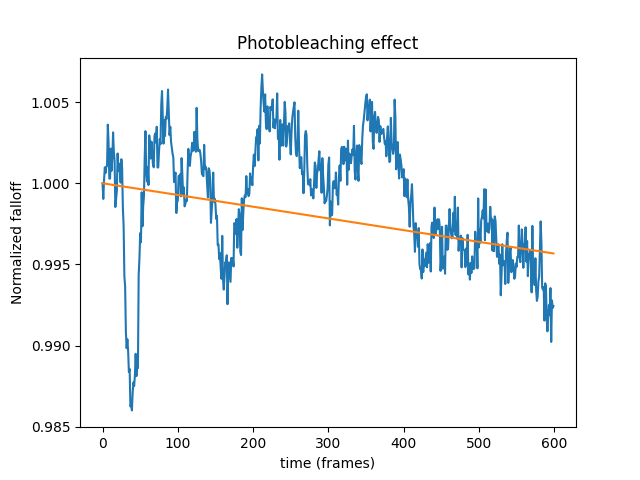

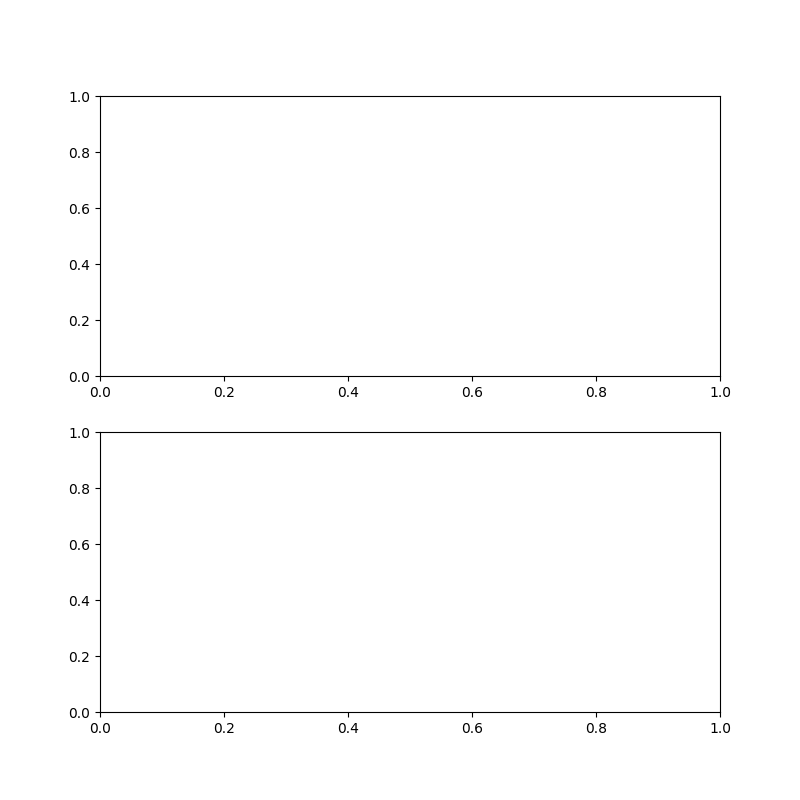

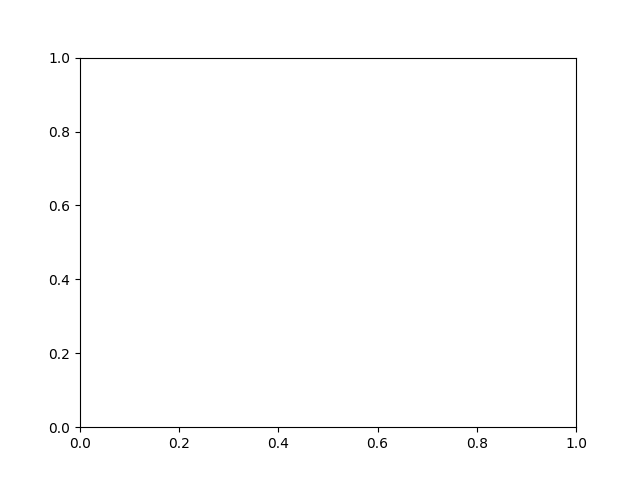

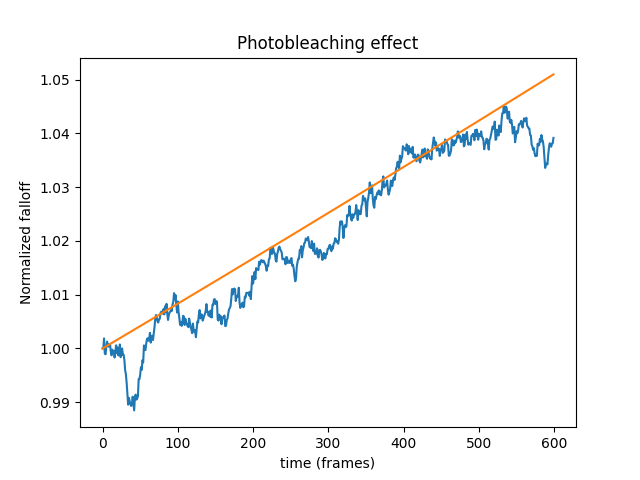

In [124]:
for i, edge in enumerate(edge_objs):
    huh = edge.extract_transport()

/scratch-local/svstaalduine/ipykernel_254116/703780572.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig2, ax2 = plt.subplots(1, bins)


IndexError: list index out of range

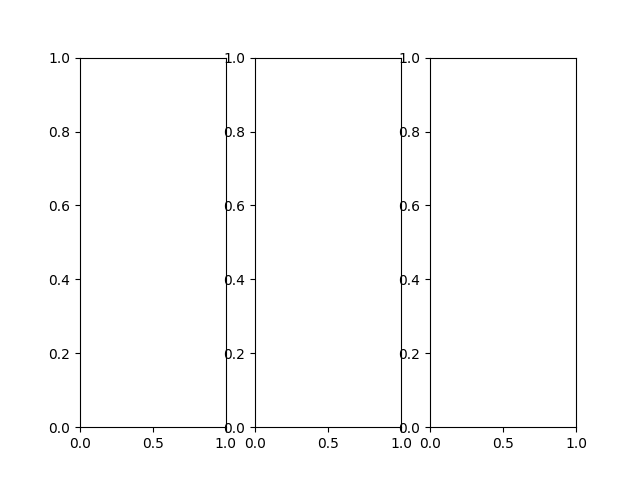

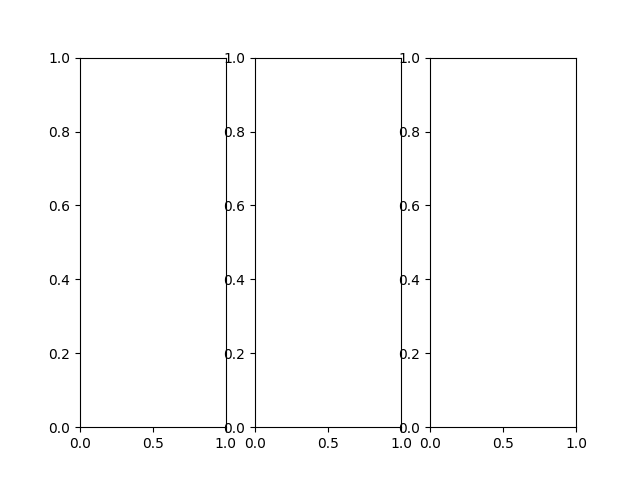

In [28]:
bins = 3
bins_space = np.linspace(0, len(kymo[0][0]), bins+1, dtype=int)
fig, ax = plt.subplots(1, bins)
fig2, ax2 = plt.subplots(1, bins)
kymo_means = np.percentile(kymo[1], .4, axis=0)
kymo_normal = kymo[1] / kymo_means
kymo_min, kymo_max = (np.min(kymo_normal), np.max(kymo_normal))
for i in range(bins):
    ax[i].plot(kymo_means[bins_space[i]:bins_space[i+1]])
    ax2[i].imshow(kymo_normal.transpose()[bins_space[i]:bins_space[i+1]].transpose(), vmin=kymo_min, vmax = kymo_max)
plt.show()

In [ ]:

fig, ax = plt.subplots(1, bins)
for i in range(1, 30):
    for j in range(bins):
        corr = signal.correlate(kymo[1][0], kymo[1][bins_space[j]:bins_space[j+1]][i])
        corr /= np.max(corr)
        lags = signal.correlation_lags(len(kymo[0][0]), len(kymo[0][bins_space[j]:bins_space[j+1]][i]))
        ax[j].plot(lags, corr)
plt.show()